In [2]:
import image_anomaly_detection as iad
import torch
from torch.utils.data import DataLoader


In [3]:
class_name = 'bottle'
data_path = '../../data/mvtec_dataset/' 
test_dataset = iad.MVTecDataset(data_path, class_name, is_train=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, pin_memory=True)
print("Number of images in dataset:", len(test_dataloader.dataset))

Number of images in dataset: 83


In [4]:
distributions_path = '../distributions/'
embedding_coreset = torch.load(distributions_path+'bottle_embedding_coreset.pt')

In [5]:
model = iad.PatchCore('resnet18', embedding_coreset=embedding_coreset)

In [6]:
images, image_classifications_target, masks_target, image_scores, score_maps = iad.eval_data(model, test_dataloader)

Inference:   0%|          | 0/3 [00:00<?, ?it/s]/home/plejd/anaconda3/envs/vision/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Inference: 100%|██████████| 3/3 [00:24<00:00,  8.05s/it]


Image level
ROC-AUC score: 0.9984126984126984

Optimal thresh: 1.951167
Recall: 0.9841269841269841
Precision: 1.0


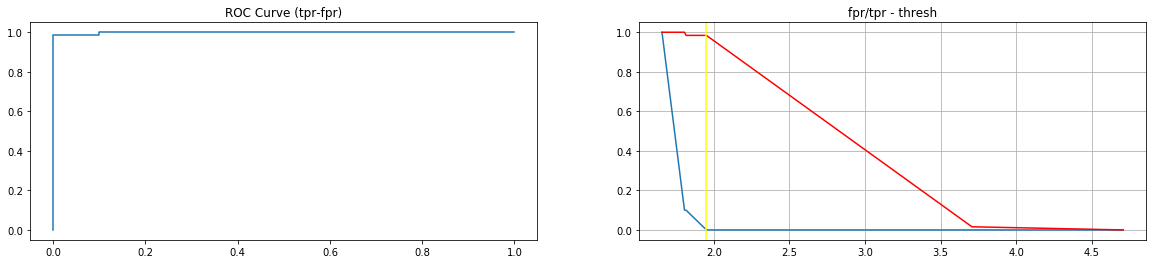

Pixel level
ROC-AUC score: 0.977898212542105

Optimal thresh: 2.2837663
Recall: 0.7764986859781886
Precision: 0.5778793652503518


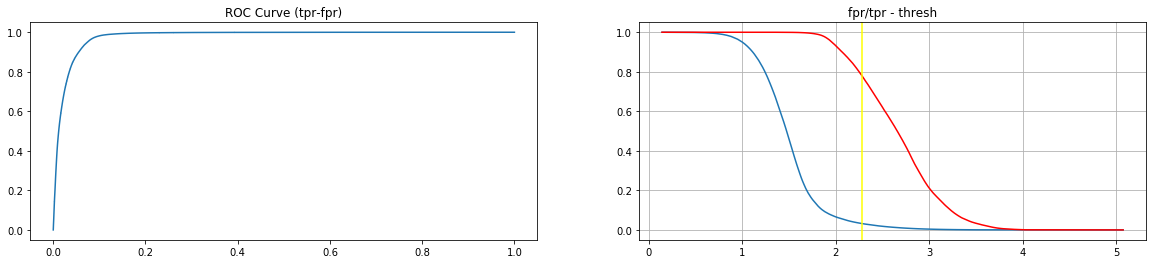

In [7]:
iad.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)

In [8]:
distributions_path = '../distributions/'
mean = torch.load(distributions_path+'bottle_mean.pt')
cov_inv = torch.load(distributions_path+'bottle_cov_inv.pt')

In [9]:
model = iad.Padim(backbone='resnet18', mean=mean, cov_inv=cov_inv, device=torch.device('cpu'))

In [10]:
images, image_classifications_target, masks_target, image_scores, score_maps = iad.eval_data(model, test_dataloader)

Inference: 100%|██████████| 3/3 [00:09<00:00,  3.17s/it]


Image level
ROC-AUC score: 0.996031746031746

Optimal thresh: 16.869349
Recall: 1.0
Precision: 0.984375


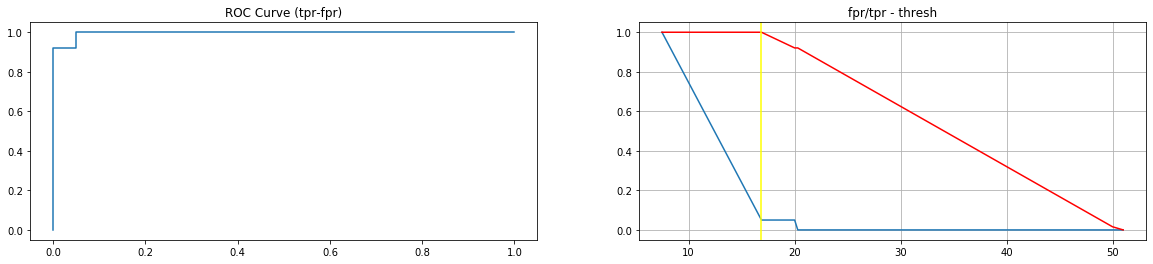

Pixel level
ROC-AUC score: 0.9840468286438052

Optimal thresh: 14.131464
Recall: 0.8013904657653216
Precision: 0.6387621997166169


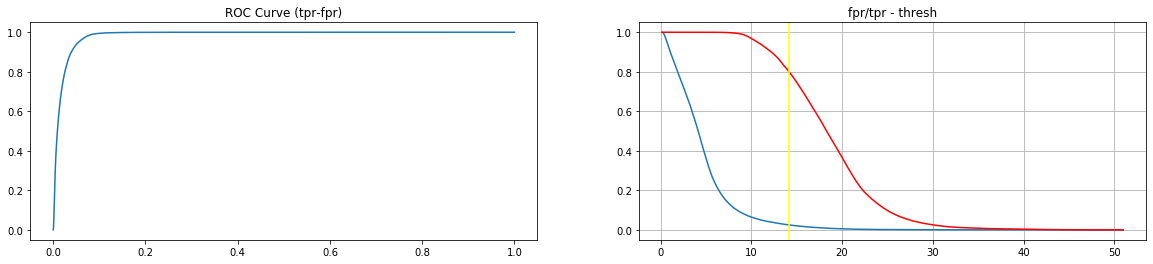

In [11]:
iad.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)